Fashion Generator

1. Import Dependencies

In [2]:
# importing libraries

# Basic tools
import pandas as pd
import numpy as np

# For Visualization
from matplotlib import pyplot as plt
import tensorflow as tf



In [3]:
print("Lets GO")

Lets GO


Handling GPU

This helps us manage the memory so that memory is used efficiently when working and allocation space in CNN

(If It causes Errors , run code without using this cell)

In [66]:

gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

"""
# use all resources
# List all physical GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Attempt to set memory growth to false and allocate all GPU memory
        for gpu in gpus:
            # Disable memory growth
            tf.config.experimental.set_memory_growth(gpu, False)
            # Allocate all available GPU memory
            tf.config.experimental.set_virtual_device_configuration(
                gpu,
                [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=None)]
            )
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
        print(e)
else:
    print("No GPU devices found.")

# Ensure TensorFlow uses all available CPU resources
from multiprocessing import cpu_count

# Create a TensorFlow config to use all CPU cores
tf.config.threading.set_intra_op_parallelism_threads(cpu_count())
tf.config.threading.set_inter_op_parallelism_threads(cpu_count())

print(f"Using {cpu_count()} CPU cores for TensorFlow operations.")
"""


'\n# use all resources\n# List all physical GPUs\ngpus = tf.config.experimental.list_physical_devices(\'GPU\')\nif gpus:\n    try:\n        # Attempt to set memory growth to false and allocate all GPU memory\n        for gpu in gpus:\n            # Disable memory growth\n            tf.config.experimental.set_memory_growth(gpu, False)\n            # Allocate all available GPU memory\n            tf.config.experimental.set_virtual_device_configuration(\n                gpu,\n                [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=None)]\n            )\n        logical_gpus = tf.config.experimental.list_logical_devices(\'GPU\')\n        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")\n    except RuntimeError as e:\n        # Virtual devices must be set before GPUs have been initialized\n        print(e)\nelse:\n    print("No GPU devices found.")\n\n# Ensure TensorFlow uses all available CPU resources\nfrom multiprocessing import cpu_count\n\n

1. Importing dataset
2. Visualalizing the dataset for shape, dimention and values of image

Images are present in form of a vector matrix

In [ ]:
# Our dataset 
import tensorflow_datasets as tfds

# loading dataset of fashion mnist
ds = tfds.load('fashion_mnist',split='train')     # split ='True' is for spliting out dataset for testing and training
# Get type of dataset im

#ported
print(type(ds))

# get dictionary with first component
ds.as_numpy_iterator().next()

# Get keys
ds.as_numpy_iterator().next().keys()

# Get an value matrix for an image
ds.as_numpy_iterator().next()['image']

2. Visualising image and build data pipeline
Time To Visualize our data using Libraries like matplot lib
Its always a good practice to visulaize a dataset before implementing any Model.

In [68]:
# Visualization
# We have already imported numpy , pandas and matplotlib


# a.  Extracting and seeing data
data_iterator= ds.as_numpy_iterator()



In [69]:



# Every time it will run it will give next value
print(data_iterator.next())

{'image': array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 6

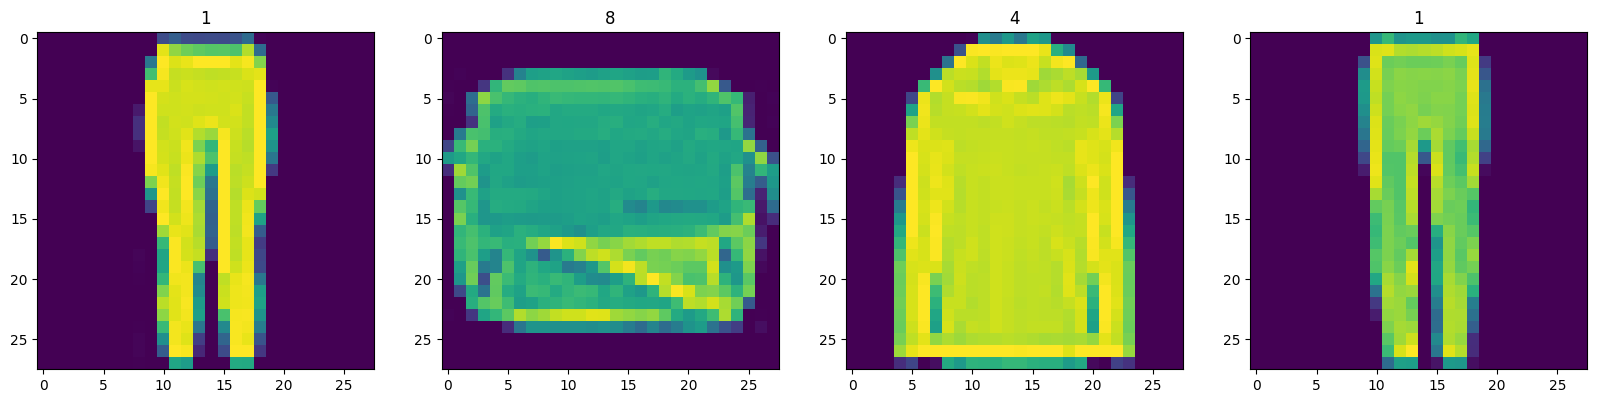

In [70]:
#  Using matplotlib to show images

its = 4  #  images to show

# Creating subplots
fig , ax = plt.subplots(ncols=its , figsize=(20,20))

# loop to get image and plot at same time
for idx in range(its):

    # sample is a datapoint which contain 2 things --> image and label
    sample = data_iterator.next()   

    # plot the image
    ax[idx].imshow(np.squeeze(sample['image']))
    # for label
    ax[idx].title.set_text(sample['label'])

    

Scale Images

coverting images from range 0 to 255 to 0 to 1
This is scaling of images 
- Fast calculation
- better training

In [71]:
# scale the images
def scale_images(sample):
    image = sample['image']
    return image / 255

Building data pipeline for tensorflow

We follow these steps:
- map
- cache
- shuffle
- batch
- prefetch

**M**ountain **C**limb **S**unsets **B**ring **P**eace

In [72]:
# build pipeline

# We are reloading the data (Repeating the step done earlier)
ds = tfds.load('fashion_mnist',split='train')

# Map : Running the dataset through the scale_image preprocessing atep
ds=ds.map(scale_images)

# Cache : cache the dataset for that baatch
ds=ds.cache()

# Shuffle : Shuffle it up
ds=ds.shuffle(60000)

# Batch : Batch into 128 image sample
ds= ds.batch(128)

# Prefetch
ds=ds.prefetch(64)


In [73]:
# accessing image now

# the image 
#ds.as_numpy_iterator().next()

# accessing the shape
print(ds.as_numpy_iterator().next())

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

**Build Neural Network**

1. Import Modelling Components

In [74]:
# Bring in the sequential api for the generator and discriminator
from tensorflow.keras.models import Sequential
# Bring in the layers for neural network
from tensorflow.keras.layers import Conv2D , Dense , Flatten , Reshape , LeakyReLU , Dropout , UpSampling2D

2. Build Generator

In [75]:
def build_generator():
    model = Sequential()

    # Takes in random values and reshapes it to 7X7X128 
    # begginings of a generated Image
    model.add(Dense(7*7*128 , input_dim=128)) #Converts a 128-dimensional random vector into a 7x7x128 tensor.
    model.add(LeakyReLU(0.2))                                     # Adds non-linearity to the model with a leaky ReLU activation function, which allows a small, positive gradient when the unit is not active (leakiness factor of 0.2).
    model.add(Reshape((7,7,128)))                                 # Reshapes the output from a flat vector to a 3D tensor with dimensions 7x7x128.

    # Upsamlpling block 1
    model.add(UpSampling2D())                                     # Doubles the dimensions of the input tensor, transforming it from 7x7 to 14x14.
    model.add(Conv2D(128 , 5 , padding='same'))                   # Applies 128 convolutional filters of size 5x5 to the upsampled tensor, maintaining the same spatial dimensions due to 'same' padding.
    model.add(LeakyReLU(0.2))                                     # Introduces non-linearity.

    # Upsampling block 2
    model.add(UpSampling2D())                                     # Again doubles the dimensions of the input tensor, transforming it from 14x14 to 28x28.
    model.add(Conv2D(128 , 5 , padding='same'))                   # Applies 128 convolutional filters of size 5x5 to the upsampled tensor, maintaining the same spatial dimensions due to 'same' padding.
    model.add(LeakyReLU(0.2))

    # Convolutional Block 1
    model.add(Conv2D(128,4,padding='same'))                       # Applies 128 convolutional filters of size 4x4 to the tensor, maintaining the same spatial dimensions due to 'same' padding.
    model.add(LeakyReLU(0.2))

    # Convolutional Block 2
    model.add(Conv2D(128,4,padding='same'))                       # Applies another 128 convolutional filters of size 4x4 to the tensor, maintaining the same spatial dimensions due to 'same' padding.
    model.add(LeakyReLU(0.2))

    # Conv layer to get to one channel
    model.add(Conv2D(1,4,padding='same',activation='sigmoid'))    # Applies a single convolutional filter of size 4x4 to reduce the number of channels from 128 to 1.
    # The sigmoid function outputs values between 0 and 1, making it suitable for generating pixel values for a grayscale image.



    return model

In [76]:
generator=build_generator()

Summary

In [77]:
generator.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 6272)           │       809,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_18 (LeakyReLU)      │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 14, 14, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_19 (LeakyReLU)      │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_5 (UpSampling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 28, 28, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_20 (LeakyReLU)      │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 28, 28, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_21 (LeakyReLU)      │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 28, 28, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_22 (LeakyReLU)      │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 28, 28, 1)      │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,155,137 (8.22 MB)

 Trainable params: 2,155,137 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

Image

In [78]:
#img = generator.predict(np.random.randn(4,128,1))
#img

In [79]:
#img = generator.predict(np.random.randn(4,128,1))

In [80]:
#img.shape

Seeing Random Images NOt Trained

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


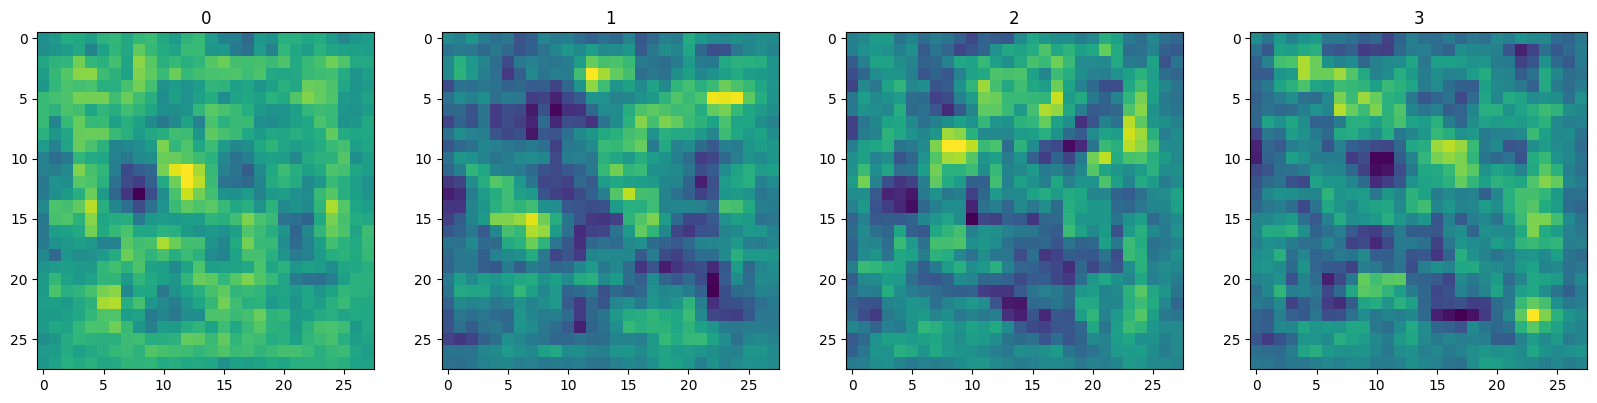

In [81]:
#  Using matplotlib to show images
img = generator.predict(np.random.randn(4,128,1))
its = 4  #  images to show

# Creating subplots
fig , ax = plt.subplots(ncols=its , figsize=(20,20))

# loop to get image and plot at same time
for idx , img in enumerate(img):

    # plot the image
    ax[idx].imshow(np.squeeze(img))
    # for label
    ax[idx].title.set_text(idx)

    

3. Build Discriminator

In [82]:
def build_discriminator():

    model = Sequential()

    # First Convulational Block
    model.add(Conv2D(32,5,input_shape=(28,28,1))) # Applies 32 convolutional filters of size 5x5 to the input image with the shape (28, 28, 1).
    model.add(LeakyReLU(0.2)) # Introduces non-linearity with a leaky ReLU activation function, which allows a small, positive gradient when the unit is not active (leakiness factor of 0.2).
    model.add(Dropout(0.4)) # Randomly drops 40% of the units in the layer to prevent overfitting

    # Second conv. block
    model.add(Conv2D(64,5)) # Applies 64 convolutional filters of size 5x5.
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Third conv. block
    model.add(Conv2D(128,5)) # Applies 128 convolutional filters of size 5x5.
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Fourth Conv Block
    model.add(Conv2D(256,5)) # Applies 256 convolutional filters of size 5x5.
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Flatten
    model.add(Flatten()) # Flattens the 3D tensor output from the previous convolutional layer into a 1D vector.
    model.add(Dropout(0.4))
    model.add(Dense(1,activation='sigmoid')) # A fully connected layer with a single output neuron and a sigmoid activation function, which outputs a value between 0 and 1 indicating the probability that the input image is real.
    


    return model

In [83]:
discriminator = build_discriminator()
discriminator.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_23 (LeakyReLU)      │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 20, 20, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_24 (LeakyReLU)      │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 16, 16, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_25 (LeakyReLU)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 12, 12, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_26 (LeakyReLU)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │        36,865 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,113,345 (4.25 MB)

 Trainable params: 1,113,345 (4.25 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:
img.shape

(28, 28, 1)

In [85]:
discriminator.predict(np.expand_dims(img,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


array([[0.51407415]], dtype=float32)

**4. Constructing Training Loop**

4.1 Setup Loose and Optimizers

In [86]:
# Adam is going to be the optimizer for both
from tensorflow.keras.optimizers import Adam
# binary ccross entropy is going to be the loss for both
from tensorflow.keras.losses import BinaryCrossentropy

In [87]:

g_opt = Adam(learning_rate=0.0001) 
d_opt = Adam(learning_rate=0.00001) 
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()



4.2 Building SubClasssed Model

In [88]:
# importing the base model classs to subclass out training step
from tensorflow.keras.models import Model

In [89]:
class FashionGAN(Model): 
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class 
        super().__init__(*args, **kwargs)
        
        # Create attributes for gen and disc
        self.generator = generator 
        self.discriminator = discriminator 
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs): 
        # Compile with base class
        super().compile(*args, **kwargs)
        
        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss 

    def train_step(self, batch):
        # Get the data 
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)
        
        # Train the discriminator
        with tf.GradientTape() as d_tape: 
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True) 
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            
            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
            
            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            
            # Calculate loss - BINARYCROSS 
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
            
        # Apply backpropagation - nn learn 
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables) 
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
        
        # Train the generator 
        with tf.GradientTape() as g_tape: 
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)
                                        
            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)
                                        
            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels) 
            
        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [90]:
# create instance of subclass model
fashgan = FashionGAN(generator , discriminator)

In [91]:
# compile the model
fashgan.compile(g_opt, d_opt , g_loss , d_loss)

4.3 Build Callbacks

In [92]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [93]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

4.3 Train

In [ ]:
# recommended 2000
hist = fashgan.fit(ds, epochs=1, callbacks=[ModelMonitor()])

# Review Performance

In [ ]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

# Testing The Generator

In [ ]:
generator.load_weights(os.path.join('archive', 'generatormodel.h5'))

In [ ]:
imgs = generator.predict(tf.random.normal((16, 128, 1)))

In [ ]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4): 
    for c in range(4): 
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])